<a href="https://colab.research.google.com/github/chinchuharris/Microarray-Analysis-NCI60/blob/main/Data602_Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data 602 Final Project:** 

#**Gene Expression analysis for cancer cell lines**

##Dataset info: 

source: http://genome-www.stanford.edu/nci60/

NCI microarray data through collaboration between Brown/Botstein laboratories, John Weinsten's group at the Laboratory of Molecular Pharmacology, and the Developmental Therapeutics program at the National Cancer Institute (NCI), Bethesda MD. 

Cell lines/experiments (cancer types) from human tumor samples. 
Each gene (columns) represents complementary DNA (cDNA) clones. 

There are 14 unique cell lines (cancer types) with a total of 64 cell lines (experiments/samples). There are 6830 genes (columns/features). 

##Question of interest: 

How does the gene expression profiles of cell lines vary depending on the cancer type? Do some cancer types have similar/dissimilar gene expression profiles?

#**Microarray Analysis:**

Microarrays visualize the up-regulation, down-regulation, and no-regulation of genes from cells. Genes from cancer cells lines are tagged with a specific fluorescent tag and genes from normal cell lines are tagged with another fluorescent tag. These tagged genes are then placed in wells of a microarray chip. Each well contains contains complementary DNA sequences called oligos which are attached the surface of the well. If a gene is indeed present in a cell line then that gene will bind of the complementary oligo attached to the well. For example, if genes from a cancer cell line were tagged with a red fluorescent tag and those genes bind to the cDNA in the well, then the color will be red but it's dependent on much of the DNA binds to the cDNA in the well. 

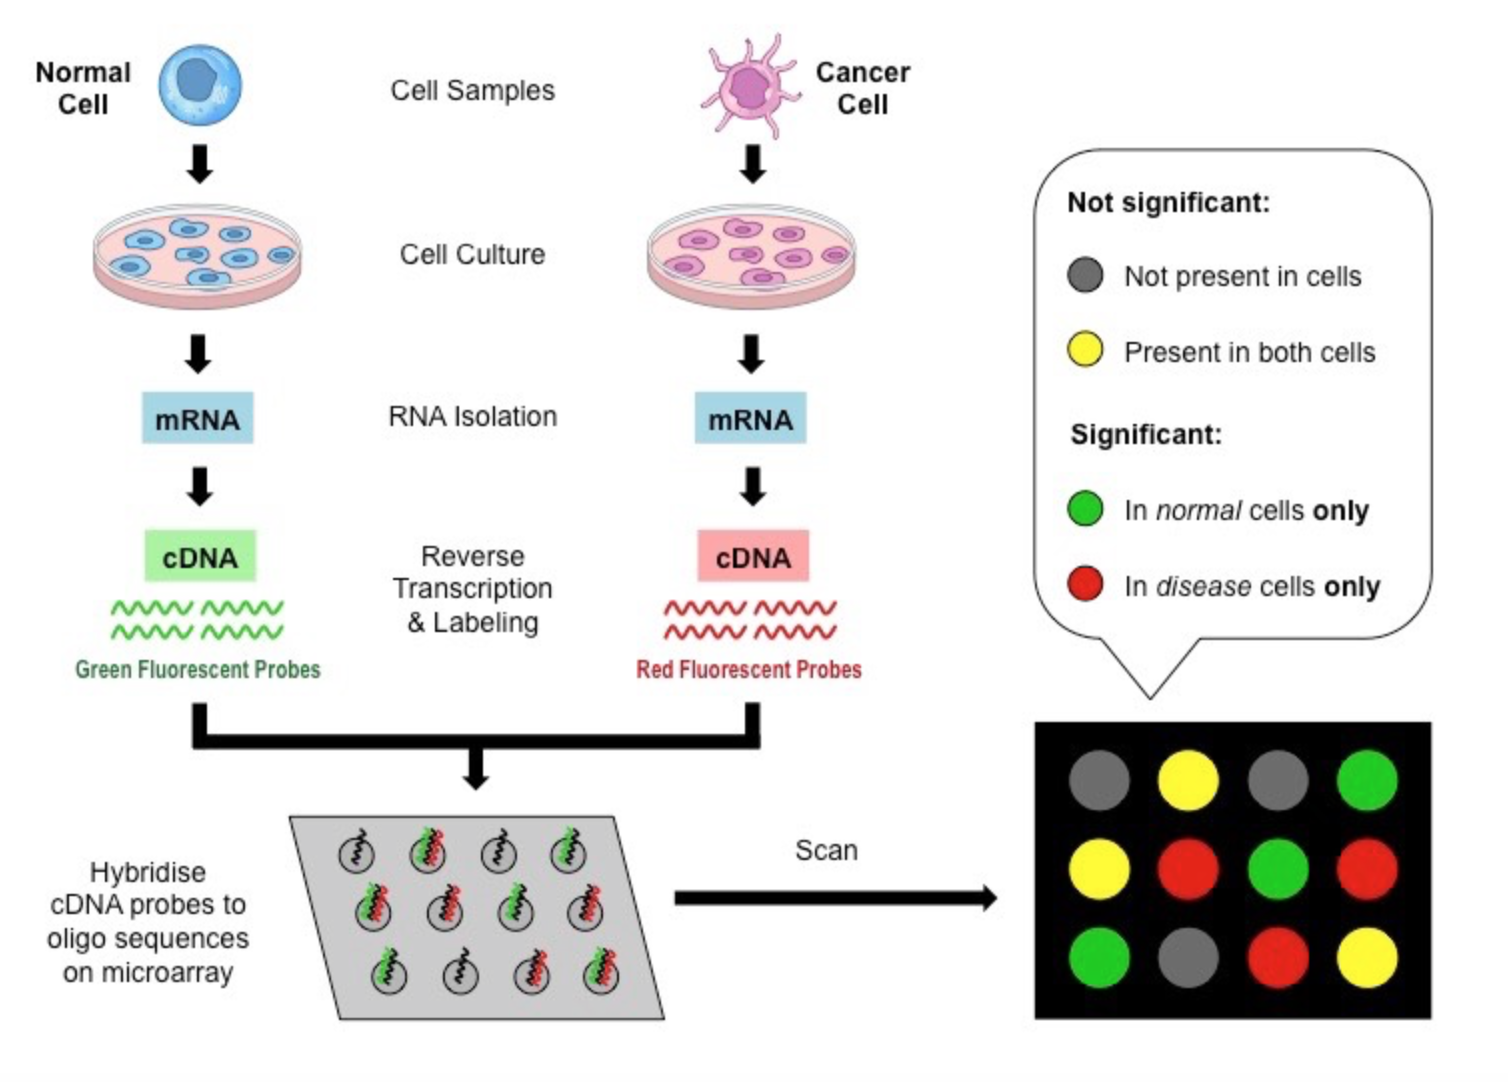

Reference for microarray image:
https://ib.bioninja.com.au/options/untitled/b4-medicine/dna-microarrays.html

In [ ]:
###Read in the data into the python working environment###
import pandas as pd 
df_2 = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv', header=None)

In [ ]:
df_2.head() #see the first few observations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,NaN,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64
1,g1,0.3,0.679961,0.94,0.28,0.485,0.31,-0.83,-0.19,0.46,0.76,0.27,-0.45,-0.03,0.71,-0.36,-0.21,-0.5,-1.06,0.15,-0.29,-0.2,0.43,-0.49,-0.53,-0.01,0.64,-0.48,0.14,0.64,0.07,0.13,0.32,0.515,0.08,0.41,-0.2,-0.3699805,-0.37,-0.43,-0.38,-0.55,-0.320039,-0.62,-0.49,0.07001953,-0.12,-0.29,-0.8100195,0.2,0.3799805,0.3100195,0.03,-0.4299805,0.16,0.01,-0.62,-0.38,0.04998047,0.65,-0.03,-0.27,0.21,-0.05,0.35
2,g2,1.18,1.289961,-0.04,-0.31,-0.465,-0.03,0,-0.87,0,1.49,0.63,-0.06,-1.12,0,-1.42,-1.95,-0.52,-2.19,-0.45,0,0.74,0.5,0.33,-0.05,-0.37,0.55,0.97,0.72,0.15,0.29,2.24,0.28,1.045,0.12,0,0,-1.38998,0.18,-0.59,-0.55,0,0.08996101,0.08,0.42,-0.8299805,0,0.03,0,-0.23,0.4499805,0.4800195,0.22,-0.3899805,-0.34,-1.28,-0.13,0,-0.7200195,0.64,-0.48,0.63,-0.62,0.14,-0.27
3,g3,0.55,0.169961,-0.17,0.68,0.395,-0.1,0.13,-0.45,1.15,0.28,-0.36,0.15,-0.05,0.16,-0.03,-0.7,-0.66,-0.13,-0.32,0.05,0.08,-0.73,0.01,-0.23,-0.16,-0.54,0.3,-0.24,-0.17,0.07,0.64,0.36,0,0.06,0.21,0.06,-0.05998047,0,-0.5,-1.71,0.1,-0.290039,0.14,-0.34,-0.5999805,-0.01,-0.31,0.2199805,0.36,0.6599805,0.9600195,0.15,-0.1799805,-0.02,-0.77,0.2,-0.06,0.4199805,0.15,0.07,-0.1,-0.15,-0.09,0.02
4,g4,1.14,0.379961,-0.04,-0.81,0.905,-0.46,-1.63,0.08,-1.4,0.1,-1.04,-0.61,0,-0.77,-2.28,-1.65,-2.61,0,-1.61,0.73,0.76,0.6,-1.66,0.17,0.93,-1.78,0.47,0,0.55,1.31,0.68,-1.88,0,0.4,0.18,-0.07,0.07001953,-1.32,-1.52,-1.87,-2.39,-1.030039,0.74,0.07,-0.9099805,0.13,1.5,0.7399805,0.18,0.7699805,0.9600195,-1.24,0.8600195,-1.73,0.94,-1.41,0.8,0.9299805,-1.97,-0.7,1.1,-1.33,-1.26,-1.23


In [ ]:
###Set the 'Gene' column/column in the 0 index position as the Index###
df_2 = df_2.set_index([0]) #The Index changed from 0-6830 to gene names

In [ ]:
#Take a look to see if index was set
df_2.head() #yes, was able to gene numbers (g1, g2, etc) as the zero index

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64
g1,0.3,0.679961,0.94,0.28,0.485,0.31,-0.83,-0.19,0.46,0.76,0.27,-0.45,-0.03,0.71,-0.36,-0.21,-0.5,-1.06,0.15,-0.29,-0.2,0.43,-0.49,-0.53,-0.01,0.64,-0.48,0.14,0.64,0.07,0.13,0.32,0.515,0.08,0.41,-0.2,-0.3699805,-0.37,-0.43,-0.38,-0.55,-0.320039,-0.62,-0.49,0.07001953,-0.12,-0.29,-0.8100195,0.2,0.3799805,0.3100195,0.03,-0.4299805,0.16,0.01,-0.62,-0.38,0.04998047,0.65,-0.03,-0.27,0.21,-0.05,0.35
g2,1.18,1.289961,-0.04,-0.31,-0.465,-0.03,0,-0.87,0,1.49,0.63,-0.06,-1.12,0,-1.42,-1.95,-0.52,-2.19,-0.45,0,0.74,0.5,0.33,-0.05,-0.37,0.55,0.97,0.72,0.15,0.29,2.24,0.28,1.045,0.12,0,0,-1.38998,0.18,-0.59,-0.55,0,0.08996101,0.08,0.42,-0.8299805,0,0.03,0,-0.23,0.4499805,0.4800195,0.22,-0.3899805,-0.34,-1.28,-0.13,0,-0.7200195,0.64,-0.48,0.63,-0.62,0.14,-0.27
g3,0.55,0.169961,-0.17,0.68,0.395,-0.1,0.13,-0.45,1.15,0.28,-0.36,0.15,-0.05,0.16,-0.03,-0.7,-0.66,-0.13,-0.32,0.05,0.08,-0.73,0.01,-0.23,-0.16,-0.54,0.3,-0.24,-0.17,0.07,0.64,0.36,0,0.06,0.21,0.06,-0.05998047,0,-0.5,-1.71,0.1,-0.290039,0.14,-0.34,-0.5999805,-0.01,-0.31,0.2199805,0.36,0.6599805,0.9600195,0.15,-0.1799805,-0.02,-0.77,0.2,-0.06,0.4199805,0.15,0.07,-0.1,-0.15,-0.09,0.02
g4,1.14,0.379961,-0.04,-0.81,0.905,-0.46,-1.63,0.08,-1.4,0.1,-1.04,-0.61,0,-0.77,-2.28,-1.65,-2.61,0,-1.61,0.73,0.76,0.6,-1.66,0.17,0.93,-1.78,0.47,0,0.55,1.31,0.68,-1.88,0,0.4,0.18,-0.07,0.07001953,-1.32,-1.52,-1.87,-2.39,-1.030039,0.74,0.07,-0.9099805,0.13,1.5,0.7399805,0.18,0.7699805,0.9600195,-1.24,0.8600195,-1.73,0.94,-1.41,0.8,0.9299805,-1.97,-0.7,1.1,-1.33,-1.26,-1.23


In [ ]:
#Set the first observation as the column names
df_2.columns = df_2.iloc[0, :] 

In [ ]:
#Check to see if the column names have been set
df_2.columns #yes, was able to set the column names

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
       's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31',
       's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40', 's41',
       's42', 's43', 's44', 's45', 's46', 's47', 's48', 's49', 's50', 's51',
       's52', 's53', 's54', 's55', 's56', 's57', 's58', 's59', 's60', 's61',
       's62', 's63', 's64'],
      dtype='object', name=nan)

In [ ]:
df_2.head() #Delete the first row because it's the same as the column names

nan,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64
g1,0.3,0.679961,0.94,0.28,0.485,0.31,-0.83,-0.19,0.46,0.76,0.27,-0.45,-0.03,0.71,-0.36,-0.21,-0.5,-1.06,0.15,-0.29,-0.2,0.43,-0.49,-0.53,-0.01,0.64,-0.48,0.14,0.64,0.07,0.13,0.32,0.515,0.08,0.41,-0.2,-0.3699805,-0.37,-0.43,-0.38,-0.55,-0.320039,-0.62,-0.49,0.07001953,-0.12,-0.29,-0.8100195,0.2,0.3799805,0.3100195,0.03,-0.4299805,0.16,0.01,-0.62,-0.38,0.04998047,0.65,-0.03,-0.27,0.21,-0.05,0.35
g2,1.18,1.289961,-0.04,-0.31,-0.465,-0.03,0,-0.87,0,1.49,0.63,-0.06,-1.12,0,-1.42,-1.95,-0.52,-2.19,-0.45,0,0.74,0.5,0.33,-0.05,-0.37,0.55,0.97,0.72,0.15,0.29,2.24,0.28,1.045,0.12,0,0,-1.38998,0.18,-0.59,-0.55,0,0.08996101,0.08,0.42,-0.8299805,0,0.03,0,-0.23,0.4499805,0.4800195,0.22,-0.3899805,-0.34,-1.28,-0.13,0,-0.7200195,0.64,-0.48,0.63,-0.62,0.14,-0.27
g3,0.55,0.169961,-0.17,0.68,0.395,-0.1,0.13,-0.45,1.15,0.28,-0.36,0.15,-0.05,0.16,-0.03,-0.7,-0.66,-0.13,-0.32,0.05,0.08,-0.73,0.01,-0.23,-0.16,-0.54,0.3,-0.24,-0.17,0.07,0.64,0.36,0,0.06,0.21,0.06,-0.05998047,0,-0.5,-1.71,0.1,-0.290039,0.14,-0.34,-0.5999805,-0.01,-0.31,0.2199805,0.36,0.6599805,0.9600195,0.15,-0.1799805,-0.02,-0.77,0.2,-0.06,0.4199805,0.15,0.07,-0.1,-0.15,-0.09,0.02
g4,1.14,0.379961,-0.04,-0.81,0.905,-0.46,-1.63,0.08,-1.4,0.1,-1.04,-0.61,0,-0.77,-2.28,-1.65,-2.61,0,-1.61,0.73,0.76,0.6,-1.66,0.17,0.93,-1.78,0.47,0,0.55,1.31,0.68,-1.88,0,0.4,0.18,-0.07,0.07001953,-1.32,-1.52,-1.87,-2.39,-1.030039,0.74,0.07,-0.9099805,0.13,1.5,0.7399805,0.18,0.7699805,0.9600195,-1.24,0.8600195,-1.73,0.94,-1.41,0.8,0.9299805,-1.97,-0.7,1.1,-1.33,-1.26,-1.23


In [ ]:
#Drop the first row in the DataFrame because it's a duplicate of the column names
df_2 = df_2.drop(df_2.index[0])

In [ ]:
df_2.head() #yes, the first row is dropped

nan,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
g1,0.3,0.679961,0.94,0.28,0.485,0.31,-0.83,-0.19,0.46,0.76,0.27,-0.45,-0.03,0.71,-0.36,-0.21,-0.5,-1.06,0.15,-0.29,-0.2,0.43,-0.49,-0.53,-0.01,0.64,-0.48,0.14,0.64,0.07,0.13,0.32,0.515,0.08,0.41,-0.2,-0.3699805,-0.37,-0.43,-0.38,-0.55,-0.320039,-0.62,-0.49,0.07001953,-0.12,-0.29,-0.8100195,0.2,0.3799805,0.3100195,0.03,-0.4299805,0.16,0.01,-0.62,-0.38,0.04998047,0.65,-0.03,-0.27,0.21,-0.05,0.35
g2,1.18,1.289961,-0.04,-0.31,-0.465,-0.03,0,-0.87,0,1.49,0.63,-0.06,-1.12,0,-1.42,-1.95,-0.52,-2.19,-0.45,0,0.74,0.5,0.33,-0.05,-0.37,0.55,0.97,0.72,0.15,0.29,2.24,0.28,1.045,0.12,0,0,-1.38998,0.18,-0.59,-0.55,0,0.08996101,0.08,0.42,-0.8299805,0,0.03,0,-0.23,0.4499805,0.4800195,0.22,-0.3899805,-0.34,-1.28,-0.13,0,-0.7200195,0.64,-0.48,0.63,-0.62,0.14,-0.27
g3,0.55,0.169961,-0.17,0.68,0.395,-0.1,0.13,-0.45,1.15,0.28,-0.36,0.15,-0.05,0.16,-0.03,-0.7,-0.66,-0.13,-0.32,0.05,0.08,-0.73,0.01,-0.23,-0.16,-0.54,0.3,-0.24,-0.17,0.07,0.64,0.36,0,0.06,0.21,0.06,-0.05998047,0,-0.5,-1.71,0.1,-0.290039,0.14,-0.34,-0.5999805,-0.01,-0.31,0.2199805,0.36,0.6599805,0.9600195,0.15,-0.1799805,-0.02,-0.77,0.2,-0.06,0.4199805,0.15,0.07,-0.1,-0.15,-0.09,0.02
g4,1.14,0.379961,-0.04,-0.81,0.905,-0.46,-1.63,0.08,-1.4,0.1,-1.04,-0.61,0,-0.77,-2.28,-1.65,-2.61,0,-1.61,0.73,0.76,0.6,-1.66,0.17,0.93,-1.78,0.47,0,0.55,1.31,0.68,-1.88,0,0.4,0.18,-0.07,0.07001953,-1.32,-1.52,-1.87,-2.39,-1.030039,0.74,0.07,-0.9099805,0.13,1.5,0.7399805,0.18,0.7699805,0.9600195,-1.24,0.8600195,-1.73,0.94,-1.41,0.8,0.9299805,-1.97,-0.7,1.1,-1.33,-1.26,-1.23
g5,-0.265,0.464961,-0.605,0.625,0.2,-0.205,0.075,0.005,-0.005,-0.525,0.015,-0.395,-0.285,0.045,0.135,-0.075,0.225,-0.485,-0.095,0.385,-0.105,-0.635,-0.185,0.825,0.395,0.315,0.425,1.715,-0.205,0.085,0.135,0.475,0.33,0.105,-0.255,-0.415,-0.07498047,-0.825,-0.785,-0.585,-0.215,0.09496101,0.205,-0.205,0.2450195,0.555,0.005,0.1149805,-0.315,0.05498047,-0.2149805,-0.305,0.7850195,-0.625,-0.015,1.585,-0.115,-0.09501953,-0.065,-0.195,1.045,0.045,0.045,-0.715


In [ ]:
#Switch the rows and columns
df_2_T = df_2.T

In [ ]:
df_2_T.head() #Check to see the transposition ocurred
              #Now the samples(experiments) are the observations and the gene numbers are the columns 

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,...,g6791,g6792,g6793,g6794,g6795,g6796,g6797,g6798,g6799,g6800,g6801,g6802,g6803,g6804,g6805,g6806,g6807,g6808,g6809,g6810,g6811,g6812,g6813,g6814,g6815,g6816,g6817,g6818,g6819,g6820,g6821,g6822,g6823,g6824,g6825,g6826,g6827,g6828,g6829,g6830
nan,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s1,0.3,1.18,0.55,1.14,-0.265,-0.07,0.35,-0.315,-0.45,-0.6549805,-0.65,-0.94,0.31,0.01500977,-0.08,-2.37,-0.54,-0.615,0,-0.5199902,-0.37,-0.29,-0.1749903,0.07,-0.04,0.025,-0.74,-0.4799903,-0.45,-0.93,0.16,-0.55,-0.5500098,0.055,-0.37,-0.165,0.21,0.47,0,-2.602085e-18,...,0.24,0.42,0.1,0.015,0,-0.2049805,0.1850195,0.46,0.009980469,-0.02,-0.095,0.2100195,0.03,0.19,-0.13,0.1249902,0.15,0,0.3750293,0.475,0.12,0.59,0.335,0.78,0.41,-0.63,1.215,0.1925,0,-0.8200098,-0.9900195,0,0.03,-0.175,0.6299805,-0.03,0,0.28,-0.34,-1.93
s2,0.679961,1.289961,0.169961,0.379961,0.464961,0.579961,0.699961,0.724961,-0.04003899,-0.2850195,-0.310039,-0.720039,-0.01003899,0,-0.570039,0,-0.470039,-0.355039,0.004980507,-0.4800292,-0.140039,-0.09003899,0.004970741,-0.220039,-0.370039,0,-0.320039,0.1599707,0.179961,-0.320039,-0.440039,0.349961,0.4499512,0.104961,0.489961,0.204961,-0.05003899,-0.01003899,0.269961,0.01996101,...,0.799961,0.269961,0.479961,-0.245039,0.279961,0.01498051,-0.07501949,0.609961,0.09994148,0.629961,0.474961,0.4199805,-0.170039,-0.09003899,-0.170039,0.4949512,-0.120039,0.679961,-0.2150097,0.484961,-0.130039,0.02996101,0.154961,0.439961,-0.320039,0.009961014,0.684961,0.572461,0.629961,-0.4000488,-0.2700585,-0.300039,-0.250039,-0.535039,0.1099415,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
s3,0.94,-0.04,-0.17,-0.04,-0.605,0,0.09,0.645,0.43,0.4750195,0.41,0.13,-0.35,0,0,0,-0.8,0,-0.004980507,0,-0.14,0.05,-0.06499027,-0.06,0.29,0.715,-0.07,-0.08999027,-0.31,0.58,-0.48,0.23,-0.04000977,-0.935,-0.75,-0.385,-0.34,0.12,-0.47,0.17,...,0.01,-0.19,0.42,0.145,0,0.06501949,-0.6449805,-0.07,0,0.37,0.565,0.4600195,0.32,0.1,0.06,0.1249902,0.27,0.48,0.8950293,0.225,0.3,0.68,0.715,0.53,0,0.12,0.295,0.7525,0.38,0,0.3199805,0.12,-0.74,-0.595,-0.2700195,-0.15,0,-0.12,-0.41,0
s4,0.28,-0.31,0.68,-0.81,0.625,-1.387779e-17,0.17,0.245,0.02,0.09501949,-0.01,-0.12,-0.21,0,0.61,-1.02,-0.47,0,-0.7649805,0,-0.31,-0.62,-0.2849903,-0.54,-0.52,-0.135,-0.89,-0.2699903,-0.84,-0.23,0.32,0,0.1099902,0.455,-0.34,-0.895,-1.08,-0.43,-0.03,-0.13,...,-0.4,-0.47,0.22,-0.495,-0.37,-0.4749805,-0.8349805,-0.37,0.2899805,-0.21,-0.785,-0.1999805,0.06,0.4,-0.16,0.1249902,0.38,0.75,1.525029,0.695,0.57,0.2,0.185,-6.938894e-18,0,-0.08,-0.875,-0.5875,-0.57,0.4399902,-1.24002,-0.11,-0.16,0.095,-0.3500195,-0.3,-1.15001,1.09,-0.26,-1.1
s5,0.485,-0.465,0.395,0.905,0.2,-0.005,0.085,0.11,0.235,1.490019493,0.685,0.605,0.355,1.220009766,2.425,0,-0.315,0.31,-0.519980507,-0.074990234,-0.865,-0.455,-0.499990273,-0.245,-0.235,-0.33,0,0.015009727,-0.105,-0.225,-0.105,-0.275,-0.575009766,-0.45,-0.465,-0.39,-0.995,-0.355,0,-0.475,...,-0.175,0.015,1.465,-0.06,-0.805,-0.719980507,-2.069980507,-0.695,1.464980469,-0.055,0.12,0.095019531,-0.635,-0.195,-0.115,-0.190009766,0.045,-0.365,0.150029259,-0.03,0.085,0.165,0.19,0.015,0.375,0.265,0,0.0075,-0.165,1.524990234,0.554980469,-0.775,-0.515,-0.32,0.634980469,0.605,0,0.745,0.425,0.145


In [ ]:
###Check DataFrame for any null values###
df_2_T.isnull().sum() #No null values in the DataFrame

0
g1             0
g2             0
g3             0
g4             0
g5             0
              ..
g6827          0
g6828          0
g6829          0
g6830          0
Tissue Type    0
Length: 6831, dtype: int64

In [ ]:
###Add the tissue type for each column###
df_2_T["Tissue Type"] =  ["CNS", "CNS", "CNS", "RENAL", "BREAST", "CNS", "CNS", 
              "BREAST", "NSCLC", "NSCLC", "RENAL", "RENAL", "RENAL", 
              "RENAL", "RENAL", "RENAL", "RENAL", "BREAST", "NSCLC","RENAL",
              "UNKNOWN", "OVARIAN", "MELANOMA", "PROSTATE", "OVARIAN", 
              "OVARIAN", "OVARIAN", "OVARIAN", "OVARIAN", "PROSTATE",
              "NSCLC", "NSCLC", "NSCLC", "LEUKEMIA", "K562B-repro",
              "K562A-repro", "LEUKEMIA", "LEUKEMIA", "LEUKEMIA",
              "LEUKEMIA", "LEUKEMIA", "COLON", "COLON", "COLON", "COLON",
              "COLON", "COLON", "COLON", "MCF7A-repro", "BREAST", 
              "MCF7D-repro", "BREAST", "NSCLC", "NSCLC", "NSCLC",
              "MELANOMA", "BREAST", "BREAST", "MELANOMA", "MELANOMA",
              "MELANOMA", "MELANOMA", "MELANOMA", "MELANOMA"] 
              
#First string in the list is empty because it corresponds to the 'Gene' column

In [ ]:
df_2_T.shape #64 cell lines/cancer types/observations and 6830 genes and the last column is the tissue type (cancer type) label

(64, 6831)

In [ ]:
df_2_T.head()

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,...,g6792,g6793,g6794,g6795,g6796,g6797,g6798,g6799,g6800,g6801,g6802,g6803,g6804,g6805,g6806,g6807,g6808,g6809,g6810,g6811,g6812,g6813,g6814,g6815,g6816,g6817,g6818,g6819,g6820,g6821,g6822,g6823,g6824,g6825,g6826,g6827,g6828,g6829,g6830,Tissue Type
nan,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s1,0.3,1.18,0.55,1.14,-0.265,-0.07,0.35,-0.315,-0.45,-0.6549805,-0.65,-0.94,0.31,0.01500977,-0.08,-2.37,-0.54,-0.615,0,-0.5199902,-0.37,-0.29,-0.1749903,0.07,-0.04,0.025,-0.74,-0.4799903,-0.45,-0.93,0.16,-0.55,-0.5500098,0.055,-0.37,-0.165,0.21,0.47,0,-2.602085e-18,...,0.42,0.1,0.015,0,-0.2049805,0.1850195,0.46,0.009980469,-0.02,-0.095,0.2100195,0.03,0.19,-0.13,0.1249902,0.15,0,0.3750293,0.475,0.12,0.59,0.335,0.78,0.41,-0.63,1.215,0.1925,0,-0.8200098,-0.9900195,0,0.03,-0.175,0.6299805,-0.03,0,0.28,-0.34,-1.93,CNS
s2,0.679961,1.289961,0.169961,0.379961,0.464961,0.579961,0.699961,0.724961,-0.04003899,-0.2850195,-0.310039,-0.720039,-0.01003899,0,-0.570039,0,-0.470039,-0.355039,0.004980507,-0.4800292,-0.140039,-0.09003899,0.004970741,-0.220039,-0.370039,0,-0.320039,0.1599707,0.179961,-0.320039,-0.440039,0.349961,0.4499512,0.104961,0.489961,0.204961,-0.05003899,-0.01003899,0.269961,0.01996101,...,0.269961,0.479961,-0.245039,0.279961,0.01498051,-0.07501949,0.609961,0.09994148,0.629961,0.474961,0.4199805,-0.170039,-0.09003899,-0.170039,0.4949512,-0.120039,0.679961,-0.2150097,0.484961,-0.130039,0.02996101,0.154961,0.439961,-0.320039,0.009961014,0.684961,0.572461,0.629961,-0.4000488,-0.2700585,-0.300039,-0.250039,-0.535039,0.1099415,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
s3,0.94,-0.04,-0.17,-0.04,-0.605,0,0.09,0.645,0.43,0.4750195,0.41,0.13,-0.35,0,0,0,-0.8,0,-0.004980507,0,-0.14,0.05,-0.06499027,-0.06,0.29,0.715,-0.07,-0.08999027,-0.31,0.58,-0.48,0.23,-0.04000977,-0.935,-0.75,-0.385,-0.34,0.12,-0.47,0.17,...,-0.19,0.42,0.145,0,0.06501949,-0.6449805,-0.07,0,0.37,0.565,0.4600195,0.32,0.1,0.06,0.1249902,0.27,0.48,0.8950293,0.225,0.3,0.68,0.715,0.53,0,0.12,0.295,0.7525,0.38,0,0.3199805,0.12,-0.74,-0.595,-0.2700195,-0.15,0,-0.12,-0.41,0,CNS
s4,0.28,-0.31,0.68,-0.81,0.625,-1.387779e-17,0.17,0.245,0.02,0.09501949,-0.01,-0.12,-0.21,0,0.61,-1.02,-0.47,0,-0.7649805,0,-0.31,-0.62,-0.2849903,-0.54,-0.52,-0.135,-0.89,-0.2699903,-0.84,-0.23,0.32,0,0.1099902,0.455,-0.34,-0.895,-1.08,-0.43,-0.03,-0.13,...,-0.47,0.22,-0.495,-0.37,-0.4749805,-0.8349805,-0.37,0.2899805,-0.21,-0.785,-0.1999805,0.06,0.4,-0.16,0.1249902,0.38,0.75,1.525029,0.695,0.57,0.2,0.185,-6.938894e-18,0,-0.08,-0.875,-0.5875,-0.57,0.4399902,-1.24002,-0.11,-0.16,0.095,-0.3500195,-0.3,-1.15001,1.09,-0.26,-1.1,RENAL
s5,0.485,-0.465,0.395,0.905,0.2,-0.005,0.085,0.11,0.235,1.490019493,0.685,0.605,0.355,1.220009766,2.425,0,-0.315,0.31,-0.519980507,-0.074990234,-0.865,-0.455,-0.499990273,-0.245,-0.235,-0.33,0,0.015009727,-0.105,-0.225,-0.105,-0.275,-0.575009766,-0.45,-0.465,-0.39,-0.995,-0.355,0,-0.475,...,0.015,1.465,-0.06,-0.805,-0.719980507,-2.069980507,-0.695,1.464980469,-0.055,0.12,0.095019531,-0.635,-0.195,-0.115,-0.190009766,0.045,-0.365,0.150029259,-0.03,0.085,0.165,0.19,0.015,0.375,0.265,0,0.0075,-0.165,1.524990234,0.554980469,-0.775,-0.515,-0.32,0.634980469,0.605,0,0.745,0.425,0.145,BREAST


In [ ]:
#Check to see how many observations of class 'Tissue Type' there are
df_2_T['Tissue Type'].value_counts(sort=True)

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7D-repro    1
UNKNOWN        1
K562A-repro    1
MCF7A-repro    1
Name: Tissue Type, dtype: int64

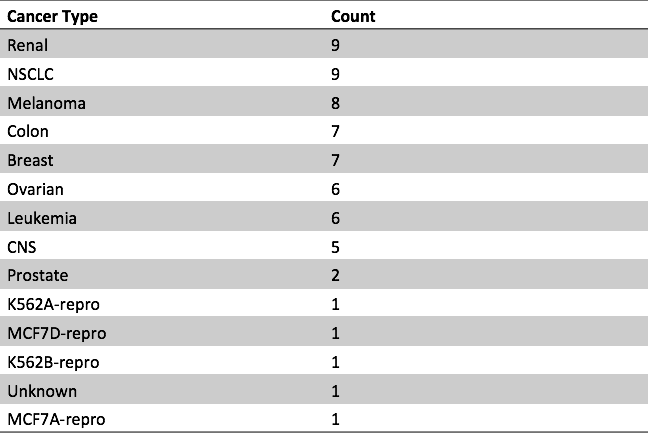


The table above shows the different cancer cell lines in the microarray dataset with their respective number of observations. 

NSCLC is a non-small cell lung cancer cell line. 
CNS is a brain cancer cell line. 
K562A-repro and K562B-repro are Leukemia cell lines. 
MCF7D-repro and MCF7A-repro are Breast cancer cell lines. 
Unknown is an unknown cancer cell line. 

In [ ]:
###Separate the dataset###

X, y = df_2_T.iloc[:, :6830].values, df_2_T.iloc[:, -1] #separate the y labels from other values for cluster analysis below
                                                        #Only interested in input data for cluster analysis


In [ ]:
y #tissue type 

nan
s1          CNS
s2          CNS
s3          CNS
s4        RENAL
s5       BREAST
         ...   
s60    MELANOMA
s61    MELANOMA
s62    MELANOMA
s63    MELANOMA
s64    MELANOMA
Name: Tissue Type, Length: 64, dtype: object

In [ ]:
#Check to see if object 'X' is a numpy array
type(X) #already a numpy array

numpy.ndarray

In [ ]:
X #the values in this array are strings so they needed to converted into float values for data visualization

array([['0.3', '1.18', '0.55', ..., '0.28', '-0.34', '-1.93'],
       ['0.679961', '1.289961', '0.169961', ..., '-0.770039',
        '-0.390039', '-2.000039'],
       ['0.94', '-0.04', '-0.17', ..., '-0.12', '-0.41', '0'],
       ...,
       ['0.21', '-0.62', '-0.15', ..., '0.16', '2.03', '3.94'],
       ['-0.05', '0.14', '-0.09', ..., '-0.49', '0.01', '-1.72'],
       ['0.35', '-0.27', '0.02', ..., '0.29', '-0.15', '1.21']],
      dtype=object)

In [ ]:
import numpy as np
X = X.astype(np.float) #convert array X values (strings) into float values 

##**KMeans Clustering:**
Here I utilize KMeans clustering for exploratory data analysis to visualize how many different clusters there are in the dataset. Each cluster presumably belongs to an unique output label. Since KMeans clustering is an unsupervised learning tool, the y labels are not known (even though we have the y labels--cancer type for this dataset). 

In [ ]:
###Run a KMeans analysis###
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, #number of clusters
            init='random', #choose 'n-clusters' (observations) at random from data for the initial centroids
            n_init=100, #run this clustering algorithm 10 times independently with random centroids #final model has lowest SSE
            max_iter=3000, #max number of iterations for a single run 
            tol=1e-04, #this is a small value (choose large value in case of convergence issues) 
            random_state=1) #set seed for reproducibility

y_km = km.fit_predict(X) #returns cluster labels after performing cluster analysis of object 'X' (input data)

In [ ]:
y_km

array([5, 5, 5, 5, 5, 5, 3, 5, 3, 6, 5, 5, 3, 5, 3, 5, 3, 3, 5, 3, 3, 3,
       3, 5, 1, 1, 1, 1, 3, 3, 5, 5, 5, 4, 0, 0, 0, 4, 4, 4, 9, 7, 7, 7,
       7, 7, 7, 7, 8, 8, 8, 8, 7, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

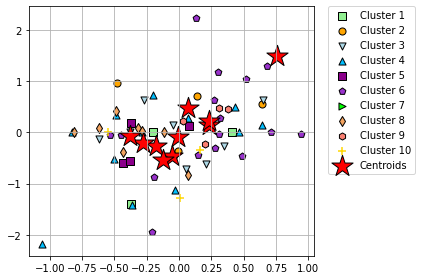

In [ ]:
###Visualize the KMeans clusters###
import matplotlib.pyplot as plt

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
           label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')


plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='deepskyblue',
            marker='^', edgecolor='black',
            label='Cluster 4')


plt.scatter(X[y_km == 4, 0],
            X[y_km == 4, 1],
            s=50, c='darkmagenta',
            marker='s', edgecolor='black',
            label='Cluster 5')


plt.scatter(X[y_km == 5, 0],
            X[y_km == 5, 1],
            s=50, c='darkorchid',
            marker='p', edgecolor='black',
            label='Cluster 6')

plt.scatter(X[y_km == 6, 0],
            X[y_km == 6, 1],
            s=50, c='lime',
            marker='>', edgecolor='black',
            label='Cluster 7')

plt.scatter(X[y_km == 7, 0],
            X[y_km == 7, 1],
            s=50, c='sandybrown',
            marker='d', edgecolor='black',
            label='Cluster 8')

plt.scatter(X[y_km == 8, 0],
            X[y_km == 8, 1],
            s=50, c='salmon',
            marker='h', edgecolor='black',
            label='Cluster 9')

plt.scatter(X[y_km == 9, 0],
            X[y_km == 9, 1],
            s=50, c='gold',
            marker='+', edgecolor='black',
            label='Cluster 10')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=500, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.tight_layout()
plt.show()

The cluster above using 'n_clusters'=10 does not show any clear clustering. The data points do not surround the clusters. Ten was chosen as the number of clusters because there at least ten distinct cancer types in the dataset. I thought maybe because of this there would be ten different clusters due to varying gene expression measurements. 

In [ ]:
###Trying clustering with only 3 clusters##
km_ = KMeans(n_clusters=3, #number of clusters
            init='random', #choose 'n-clusters' (observations) at random from data for the initial centroids
            n_init=10, #run this clustering algorithm 10 times independently with random centroids #final model has lowest SSE
            max_iter=300, #max number of iterations for a single run 
            tol=1e-04, #this is a small value (choose large value in case of convergence issues) 
            random_state=1) #set seed for reproducibility

y_km_ = km_.fit_predict(X) #returns cluster labels after performing cluster analysis of object 'X' (input data)

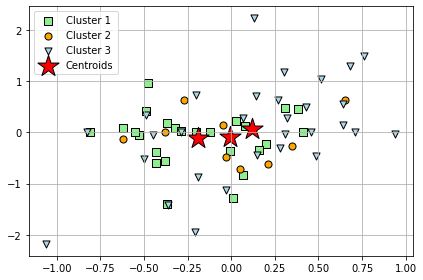

In [ ]:
###Visualize the KMeans clusters for k=3###
plt.scatter(X[y_km_ == 0, 0],
            X[y_km_ == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km_ == 1, 0],
            X[y_km_ == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km_ == 2, 0],
            X[y_km_ == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km_.cluster_centers_[:, 0],
            km_.cluster_centers_[:, 1],
            s=500, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Even with 'n_clusters' equal to three, the datapoints are not clustering around the centroids. The next step is figure out the optimal number of clusters for the dataset. 

##**Elbow Method:**

Here I utilize the elbow method to assess the quality of the clusters in the KMeans models. The SSE (sum of squared error) is used to quantify the performance of each of the clusters. 

In [ ]:
###Trying the elbow method to figure out the optimal number of clusters for the dataset###
print('Distortion: %.2f' % km.inertia_)  #High SSE value for km model with 10 clusters
print('Distortion: %.2f' % km_.inertia_) #Even higher SSE value for km model with 3 clusters

Distortion: 157035.74
Distortion: 216324.35


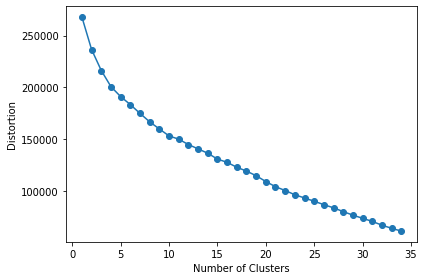

In [ ]:
###Plotting the SSE based on the number of clusters in the model###
distortions = []

for i in range(1, 35):
  km = KMeans(n_clusters=i, #trying k as 1 to 34
              init='k-means++', #smart way clustering to speed up convergence 
              n_init=10, #run this clustering algorithm 10 times independently with random centroids #final model has lowest SSE
              max_iter=300, #max number of iterations for a single run 
              random_state=1) #set seed for reproducibility
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

From the eblow plot above, there is not clear 'elbow', as in no clear 'n-cluster' numerical value that works for this microarray dataset. 

##**Silhouette Analysis:**

This metric is used to quantify how tightly grouped the data points are in each of the clusters. 

In [ ]:
###Construct silhouette plots to quantify the quality of the clustering###
##Silhouette plots used to figure out how examples' grouped tightness in the cluster##

k_m = KMeans(n_clusters=5, #five clusters
             init='k-means++', #smart way clustering to speed up convergence 
             n_init=10, #run this clustering algorithm 10 times independently with random centroids #final model has lowest SSE
             max_iter=300, #max number of iterations for a single run
             tol=1e-04,  #this is a small value (choose large value in case of convergence issues)
             random_state=1) #set seed for reproducibility

y_k_m = k_m.fit_predict(X)  #returns cluster labels after performing cluster analysis of object 'X' (input data)

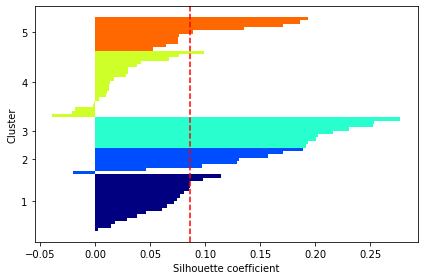

In [ ]:
###Creating silhouette plots###
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_k_m)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_k_m, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_k_m == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals, 
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

The average silhouette coefficient is close to 0.10. The silhouette coefficients are close to zero, which is indicative of poor clustering. The silhouettes have varying lengths and widths, further signaling that this is an example of poor clustering. 

 

##**KMeans Clustering with PC Inputs:**

Next, I will run the dataset through PCA before developing a K-means clustering model.

In [ ]:
###Standardize the data## 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X) #input is standardized


In [ ]:
###PCA with scikit learn###
from sklearn.decomposition import PCA
pca = PCA(n_components=15) #instantiate pca object

#dimensionality reduction
p_comp = pca.fit_transform(X_std) #Apply dimensionality reduction on X

([<matplotlib.axis.XTick at 0x7f91b7d3ea90>,
 <a list of 15 Text major ticklabel objects>)

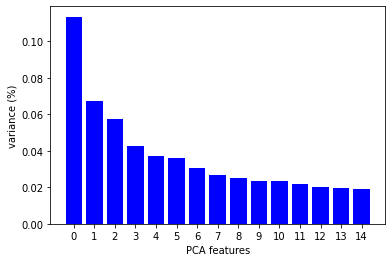

In [ ]:
###Plotting the components###
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance (%)')
plt.xticks(features)

There's a very clear variance drop after the first principal componet (denoted as PCA feature 0). Most of the variance is found in the first four principal components. 

Next step: Redo PCA with five principal components 

([<matplotlib.axis.XTick at 0x7f91b7b5c4e0>,
 <a list of 5 Text major ticklabel objects>)

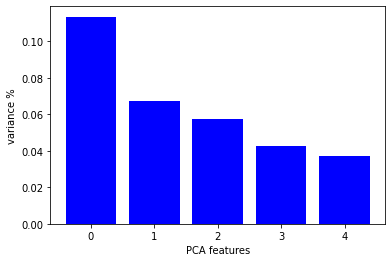

In [ ]:
###Redo PCA with n_components = 5###
###PCA with scikit learn###
from sklearn.decomposition import PCA
pca = PCA(n_components=5) #instantiate pca object

#dimensionality reduction
p_comp = pca.fit_transform(X_std)

###Plotting the components###
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
# Save the principal components to a DataFrame
PCA_comp_df = pd.DataFrame(p_comp)

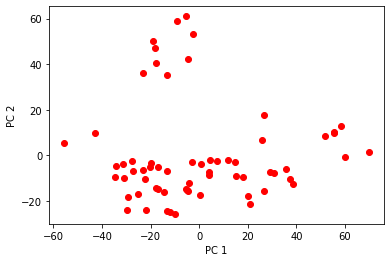

In [ ]:
###Visualize the first two principal components where most of the variability in the data lies###
plt.scatter(PCA_comp_df[0], PCA_comp_df[1], alpha=1.0, color='red') #scatterplot with the first two PCAs
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

The principal components (PC 1 and PCA 2) reduced the 6,830 gene expression values into two dimensions. There are two predominant clusters displayed in the scatter plot above. One at the top of the scatter plot and one at the bottom. 

Next step: Develop a KMeans model with PCA inputs. 

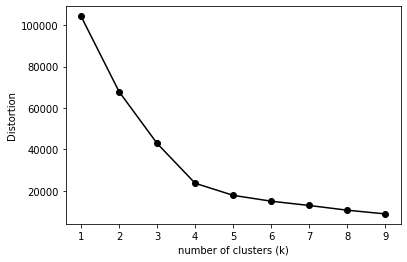

In [ ]:
#Fitting the kMeans model to the reduced dataset:
from sklearn.cluster import KMeans

ks = range(1, 10)
distortions = []
for k in ks:
    km = KMeans(n_clusters=k) #instantiate KMeans object with 'k' clusters
    
    # Fit model to samples
    km.fit(PCA_comp_df.iloc[:, :3])
    
    # Append the inertia to the list of inertias
    distortions.append(km.inertia_)
    
plt.plot(ks, distortions, '-o', color='black')
plt.xlabel('number of clusters (k)')
plt.ylabel('Distortion')
plt.xticks(ks)
plt.show()

There's a clear elbow at when k=4, meaning that the first four principal components express most of the variance in the data. 


In [ ]:
###Develop a KMeans model now with only four clusters###
km_ = KMeans(n_clusters=4, #number of clusters
            init='random', #choose 'n-clusters' (observations) at random from data for the initial centroids
            n_init=10, #run this clustering algorithm 10 times independently with random centroids #final model has lowest SSE
            max_iter=300, #max number of iterations for a single run 
            tol=1e-04, #this is a small value (choose large value in case of convergence issues) 
            random_state=1) #set seed for reproducibility

y_km_ = km_.fit_predict(p_comp)

In [ ]:
y_km_ #The new clusters 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

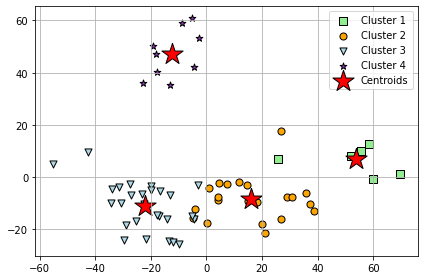

In [ ]:
###Visualize the KMeans clusters for k=4###
plt.scatter(p_comp[y_km_ == 0, 0],
            p_comp[y_km_ == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(p_comp[y_km_ == 1, 0],
            p_comp[y_km_ == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(p_comp[y_km_ == 2, 0],
            p_comp[y_km_ == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(p_comp[y_km_ == 3, 0],
            p_comp[y_km_ == 3, 1],
            s=50, c='darkorchid',
            marker='*', edgecolor='black',
            label='Cluster 4')

plt.scatter(km_.cluster_centers_[:, 0], #first pca
            km_.cluster_centers_[:, 1], #second pca
            s=500, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

There are four clear clusters shown above and the data points are surrounding the centroids for the most part. 

##**Relating cluster points to the original dataset:**

In [ ]:
km_.cluster_centers_  #-24.063780983146618 #-7.385488317388315

array([[ 53.87336704,   6.92561383, -30.75002689,  -3.45688058,
          5.14025761],
       [ 16.06917761,  -8.40080744,  16.99141009,  -0.68245487,
         -1.636417  ],
       [-22.29616601, -10.99472004,  -7.96621235,   2.49005291,
          0.29048078],
       [-12.50775741,  47.1994556 ,   8.1687011 ,  -3.18907914,
         -1.05111413]])

In [ ]:
km_.labels_ #Cluster labels 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
#Retrieve the indices of the points in the clusters
relations = {i: np.where(km_.labels_ == i)[0] for i in range(km_.n_clusters)} 

In [ ]:
relations #object that contains a dictionary with cluster numbers are their respective data points' indices from the initial dataset

{0: array([34, 35, 36, 37, 38, 39, 40]),
 1: array([23, 24, 26, 28, 31, 32, 33, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 2: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 25, 27, 29, 30]),
 3: array([55, 56, 57, 58, 59, 60, 61, 62, 63])}

In [ ]:
###Create a new list with the key value pairs from the dictionary above###
new_list = []
for key, value in relations.items():
  pair = [key, value]
  new_list.append(pair)

In [ ]:
new_list #gives list of all the values in each of the four clusters

[[0, array([34, 35, 36, 37, 38, 39, 40])],
 [1, array([23, 24, 26, 28, 31, 32, 33, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54])],
 [2, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 25, 27, 29, 30])],
 [3, array([55, 56, 57, 58, 59, 60, 61, 62, 63])]]

In [ ]:
new_list[1][1] #Take a look at the indices of data points in cluster two (cluster one is '0' in the list).

array([23, 24, 26, 28, 31, 32, 33, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

In [ ]:
###Retrieve the data values (y labels) associated with each of the indices for cluster one###
cluster_one = []
for i in new_list[0][1]:
  cluster_one.append(y[i])


In [ ]:
cluster_one #list of all the tissue types found in the first cluster

['K562B-repro',
 'K562A-repro',
 'LEUKEMIA',
 'LEUKEMIA',
 'LEUKEMIA',
 'LEUKEMIA',
 'LEUKEMIA']

In [ ]:
###Retrieve the data values (y labels) associated with each of the indices for cluster two###
cluster_two = []
for i in new_list[1][1]:
  cluster_two.append(y[i])

In [ ]:
cluster_two #list of all the tissue types found in the second cluster

['PROSTATE',
 'OVARIAN',
 'OVARIAN',
 'OVARIAN',
 'NSCLC',
 'NSCLC',
 'LEUKEMIA',
 'COLON',
 'COLON',
 'COLON',
 'COLON',
 'COLON',
 'COLON',
 'COLON',
 'MCF7A-repro',
 'BREAST',
 'MCF7D-repro',
 'BREAST',
 'NSCLC',
 'NSCLC',
 'NSCLC']

In [ ]:
###Retrieve the data values (y labels) associated with each of the indices for cluster three###
cluster_three = []
for i in new_list[2][1]:
  cluster_three.append(y[i])

In [ ]:
cluster_three #list of all the tissue types found in the third cluster

['CNS',
 'CNS',
 'CNS',
 'RENAL',
 'BREAST',
 'CNS',
 'CNS',
 'BREAST',
 'NSCLC',
 'NSCLC',
 'RENAL',
 'RENAL',
 'RENAL',
 'RENAL',
 'RENAL',
 'RENAL',
 'RENAL',
 'BREAST',
 'NSCLC',
 'RENAL',
 'UNKNOWN',
 'OVARIAN',
 'MELANOMA',
 'OVARIAN',
 'OVARIAN',
 'PROSTATE',
 'NSCLC']

In [ ]:
###Retrieve the data values (y labels) associated with each of the indices for cluster four###
cluster_four = []
for i in new_list[3][1]:
  cluster_four.append(y[i])

In [ ]:
cluster_four #list of all the tissue types found in the fourth cluster

['MELANOMA',
 'BREAST',
 'BREAST',
 'MELANOMA',
 'MELANOMA',
 'MELANOMA',
 'MELANOMA',
 'MELANOMA',
 'MELANOMA']

In [ ]:
###Convert all the cluster lists into DataFrames for increased functionality###
clus_one_df = pd.DataFrame(cluster_one)
clus_two_df = pd.DataFrame(cluster_two)
clus_three_df = pd.DataFrame(cluster_three)
clus_four_df = pd.DataFrame(cluster_four)

In [ ]:
clus_one_df.value_counts() #y label values along with number of observations

LEUKEMIA       5
K562B-repro    1
K562A-repro    1
dtype: int64

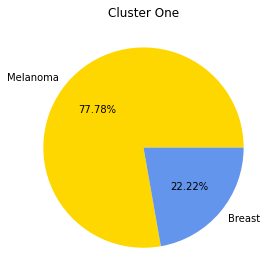

In [ ]:
###Create pie chart for cluster one###
labs = ["Melanoma", "Breast"]
values = [7, 2]
color = ["gold", "cornflowerblue"]
plt.pie(values, labels=labs, colors=color,autopct='%.2f%%')
plt.title("Cluster One")
plt.tight_layout()
plt.show()

Cluster one contains mostly Melanoma (77%) and Breast (22%) observations. 

In [ ]:
clus_two_df.value_counts() #y label values along with number of observations

COLON          7
NSCLC          5
OVARIAN        3
BREAST         2
PROSTATE       1
MCF7D-repro    1
MCF7A-repro    1
LEUKEMIA       1
dtype: int64

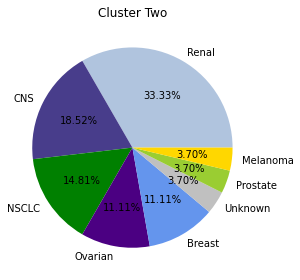

In [ ]:
###Create pie chart for cluster two###
labs = ["Renal", "CNS", "NSCLC", "Ovarian", "Breast", "Unknown", "Prostate", "Melanoma"]
values = [9, 5, 4, 3, 3, 1, 1, 1]
color = ["lightsteelblue", "darkslateblue", "green", "indigo", "cornflowerblue", "silver", "yellowgreen", "gold"]
plt.pie(values, labels=labs, colors=color, autopct='%.2f%%')
plt.title("Cluster Two")
plt.tight_layout()
plt.show()

Cluster two contains a varied number of cancer types. The notable cancer type is Renal (33%) and the second cancer type is CNS (18%). 

In [ ]:
clus_three_df.value_counts() #y label values along with number of observations

RENAL       9
CNS         5
NSCLC       4
OVARIAN     3
BREAST      3
UNKNOWN     1
PROSTATE    1
MELANOMA    1
dtype: int64

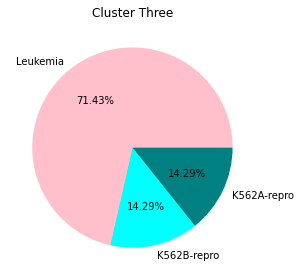

In [ ]:
###Cluster Three###
labs = ["Leukemia", "K562B-repro", "K562A-repro"]
values = [5, 1, 1]
color = ["pink", "aqua", "teal"]
plt.pie(values, labels=labs, colors=color, autopct='%.2f%%')
plt.title("Cluster Three")
plt.tight_layout()
plt.show()

Cluster three is predominantly comprised of Leukemia observations (71%). The other cell lines are Leukemia cell lines, which makes sense because they have similar gene expressions the Leukemia cell line. 

In [ ]:
clus_four_df.value_counts() #y label values along with number of observations

MELANOMA    7
BREAST      2
dtype: int64

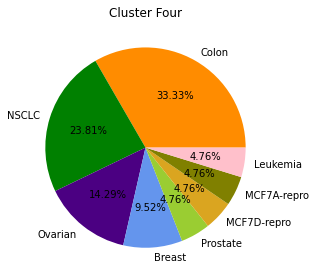

In [ ]:
labs = ["Colon", "NSCLC", "Ovarian", "Breast", "Prostate", "MCF7D-repro", "MCF7A-repro", "Leukemia"]
values = [7, 5, 3, 2, 1, 1, 1, 1]
color = ["darkorange", "green", "indigo", "cornflowerblue", "yellowgreen", "goldenrod", "olive", "pink"]
plt.pie(values, labels=labs, colors=color ,autopct='%.2f%%')
plt.title("Cluster Four")
plt.tight_layout()
plt.show()

The main cell line present in cluster four is the colon cell line (33%). There are most varied class labels in this cluster. 

##**Discussion**

**Melanoma:**
Predominantly found in the first cluster (77%) with a fewer number of cases present in the second cluster. This could be intrepreted as the gene expression profiles for Melanoma cell lines are mostly consisent (i.e. it has a distinct gene expression profile). 

**Breast:**
On the other hand, the gene expression profile for the Breast cancer cell line is the most varied, showing up in cluster one, two, and three. The MCF71-repro and MCF7D-repro are also breast cancer cell lines which can be seen in cluster four. 

**CNS (brain cancer) & Renal:**
These two cancer cell lines are only present in cluster two, meaning that they might have similar gene expression profiles. 

**NSCLC (non-small cell lung cancer) & Ovarian:**
Both can be found in cluster two and three, thus these cell lines could potentially have similar gene expression profiles. 

**Colon:**
The colon cancer cell line can only be found in cluster four, thus this cell line might have a distinct gene expression profile. 

**Prostate:**
The prostate cell lines show up in cluster two and three along with the NSCLC, Ovarian, and some Breast cancer cell lines, thus the aforementioned cell lines might have similar gene expression profiles. 

**Leukemia:**
The Leukemia cell lines (K562A-repro and k562B-repro) are found predominantly in cluster three. This cluster only contains Leukemia cell lines. What this means is that the Leukemia cell lines have a distinct gene expression profile. A smaller number of Leukemia cell lines can be found in cluster four. 